<h1> Title </h1>

In [2]:
import pandas as pd
import os

<h2>First, we combine all patients datasets into one large dataset </h2>

In [ ]:
data_path = '/home/student/Early_Prediction_of_Sepsis/data/train/'
patients = os.listdir('data/train')
df = pd.read_csv(os.path.join(data_path,patients[0]),delimiter ='|')
stats = df.describe()
df['ID'] = patients[0].split('_')[-1].split('.')[0]
std = stats[stats.index=='std']
std['ID'] = patients[0].split('_')[-1].split('.')[0]
new_df = df[df['SepsisLabel']==0]
if max(df['SepsisLabel'])==1:
    new_df=new_df.append(df[df['SepsisLabel']==1][:1])
for patient in patients[1:]:
    patient_path = os.path.join(data_path,patient)
    patient_number = patient.split('_')[-1].split('.')[0]
    tmp_df = pd.read_csv(os.path.join(data_path,patient_path),delimiter ='|')
    tmp_stats = tmp_df.describe()
    tmp_std = tmp_stats[tmp_stats.index=='std']
    tmp_df['ID'] = patient_number
    tmp_std['ID'] = patient_number
    df = df.append(tmp_df)
    std = std.append(tmp_std)
    tmp_new_df = tmp_df[tmp_df['SepsisLabel']==0]
    if max(df['SepsisLabel'])==1:
        tmp_new_df=tmp_new_df.append(tmp_df[tmp_df['SepsisLabel']==1][:1])
    new_df = new_df.append(tmp_new_df)

<ipython-input-4-2451cb8543f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std['ID'] = patients[0].split('_')[-1].split('.')[0]
<ipython-input-4-2451cb8543f8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_std['ID'] = patient_number
<ipython-input-4-2451cb8543f8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
# df.to_csv('train_data_combined.csv')
new_df.to_csv('filtered_train_data_combined.csv')
std.to_csv('stds_train_data.csv')

In [26]:
df = pd.read_csv('Early_Prediction_of_Sepsis/train_data_combined.csv')

In [28]:
df[df['SepsisLabel']==1]

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID
54,2,97.0,99.0,NaN,109.0,65.00,NaN,19.0,NaN,NaN,...,NaN,NaN,80.47,0,0.0,1.0,-252.79,3,1,19816
55,3,104.5,98.0,NaN,130.5,70.67,NaN,16.5,NaN,NaN,...,NaN,NaN,80.47,0,0.0,1.0,-252.79,4,1,19816
56,4,100.0,99.0,35.72,99.0,59.67,NaN,18.0,NaN,NaN,...,NaN,NaN,80.47,0,0.0,1.0,-252.79,5,1,19816
57,5,102.5,98.5,NaN,97.0,59.00,NaN,19.0,NaN,1.0,...,NaN,NaN,80.47,0,0.0,1.0,-252.79,6,1,19816
58,6,105.5,97.0,NaN,96.5,59.17,NaN,20.0,NaN,NaN,...,NaN,239.0,80.47,0,0.0,1.0,-252.79,7,1,19816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766629,81,82.0,94.0,NaN,138.0,112.00,96.0,16.0,NaN,NaN,...,NaN,NaN,27.00,0,0.0,1.0,-300.47,82,1,601
766630,82,77.0,97.0,36.30,113.0,90.00,75.0,17.0,NaN,NaN,...,NaN,NaN,27.00,0,0.0,1.0,-300.47,83,1,601
766631,83,73.0,100.0,NaN,122.0,98.00,83.0,18.0,NaN,NaN,...,NaN,NaN,27.00,0,0.0,1.0,-300.47,84,1,601
766632,84,76.0,100.0,NaN,105.0,80.00,66.0,13.5,NaN,NaN,...,NaN,204.0,27.00,0,0.0,1.0,-300.47,85,1,601


In [20]:
demographic_df = df[['ID','Age','Gender','SepsisLabel','ICULOS']]
demographic_df = demographic_df.groupby(by='ID').max()

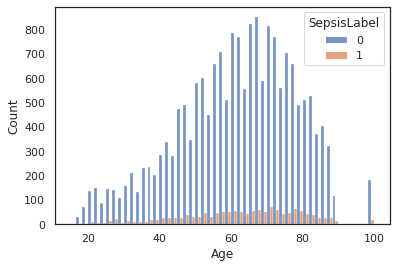

In [26]:
import seaborn as sns;
sns.set(style="white", color_codes=True)
_= sns.histplot(x='Age',hue='SepsisLabel',data=demographic_df, multiple="dodge")

In [22]:
pd.melt(demographic_df,['SepsisLabel'])

,SepsisLabel,variable,value
0,0,Age,75.91
1,1,Age,65.79
2,0,Age,52.88
3,0,Age,49.52
4,0,Age,73.00
...,...,...,...
59995,0,ICULOS,29.00
59996,0,ICULOS,43.00
59997,0,ICULOS,15.00
59998,0,ICULOS,42.00


In [13]:
df2 = pd.read_csv('/home/student/Early_Prediction_of_Sepsis/data/train/patient_10964.psv',delimiter ='|')
df2

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,69,0,0,1,-11.08,1,0
1,96.0,100.0,NaN,151.0,89.0,55.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,69,0,0,1,-11.08,2,0
2,95.0,100.0,NaN,178.0,107.0,63.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,69,0,0,1,-11.08,3,0
3,88.0,100.0,36.1,130.0,101.0,75.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,69,0,0,1,-11.08,4,0
4,88.5,100.0,NaN,132.0,96.5,72.0,16.0,NaN,NaN,NaN,...,19.7,NaN,247.0,69,0,0,1,-11.08,5,0
5,97.0,100.0,NaN,132.0,79.0,49.0,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,69,0,0,1,-11.08,6,0
6,97.0,100.0,NaN,113.0,76.0,53.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,69,0,0,1,-11.08,7,0
7,88.0,100.0,NaN,113.0,66.0,43.0,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,69,0,0,1,-11.08,8,0
8,79.0,100.0,NaN,101.0,68.0,46.0,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,69,0,0,1,-11.08,9,0
9,83.0,100.0,NaN,133.0,79.0,51.0,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,69,0,0,1,-11.08,10,0


In [31]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-1.11.0-cp38-cp38-manylinux1_x86_64.whl (750.6 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
torch.cuda.is_available()

False